<a href="https://colab.research.google.com/github/IT-17005/Transfer-Learning/blob/master/PracticeSchizophrenia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import clear_output
!pip install imutils
clear_output()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
from keras.layers import Input,Dense
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import MobileNet
from keras.applications.densenet import preprocess_input
from keras.applications.densenet import DenseNet
from keras.applications.densenet import DenseNet121
from keras.preprocessing import sequence
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import itertools 
from keras.models import Model    
from keras.layers import *
from keras.layers import LSTM, Dense
from keras.applications.xception import Xception
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input

from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2 

import time
import numpy as np
from keras.layers import Embedding
from keras.constraints import *
from keras.optimizers import *
from keras.utils import np_utils
from keras import Model
from keras.layers import *
from keras.datasets import imdb
import matplotlib.pyplot as plt
from keras import backend as K
import tensorflow as tf
from glob import glob
import numpy as np
import PIL.Image
import PIL
import cv2
import os

In [ ]:
!apt-get install tree
clear_output()
# create new folders
!mkdir TRAIN TEST VAL TRAIN/YES TRAIN/NO TEST/YES TEST/NO VAL/YES VAL/NO
!tree -d

.
├── sample_data
├── TEST
│   ├── NO
│   └── YES
├── TRAIN
│   ├── NO
│   └── YES
└── VAL
    ├── NO
    └── YES

10 directories


In [ ]:
from google.colab import drive
drive .mount('/content/drive/') 

Mounted at /content/drive/


In [ ]:
Train="/content/drive/MyDrive/dataset/data/train"
Test="/content/drive/MyDrive/dataset/data/test"
Valid="/content/drive/MyDrive/dataset/data/validation"

In [ ]:
train= ImageDataGenerator(rescale=1/255)
valid=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset= train.flow_from_directory(Train, 
                                                        target_size=(224,224),
                                                         batch_size=16,
                                                        class_mode='categorical')

valid_dataset=valid.flow_from_directory(Valid, 
                                                        target_size=(224,224),
                                                         batch_size=16,
                                                        class_mode='categorical')

test_dataset=test.flow_from_directory(Test, 
                                                        target_size=(224,224),
                                                         batch_size=16,
                                                        class_mode='categorical')

Found 282 images belonging to 2 classes.
Found 95 images belonging to 2 classes.
Found 87 images belonging to 2 classes.


In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        9

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=['accuracy'])

In [ ]:
history_densenet=model.fit(train_dataset, epochs=10, steps_per_epoch=15, validation_data=(valid_dataset),validation_steps=5)

Epoch 1/10
15/15 [==============================] - 70s 5s/step - loss: 0.0560 - accuracy: 0.9701 - val_loss: 0.7959 - val_accuracy: 0.8000
Epoch 2/10
15/15 [==============================] - 12s 792ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1960 - val_accuracy: 0.9000
Epoch 3/10
15/15 [==============================] - 13s 849ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1084 - val_accuracy: 0.9250
Epoch 4/10
15/15 [==============================] - 11s 764ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0859 - val_accuracy: 0.9500
Epoch 5/10
15/15 [==============================] - 12s 792ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0876 - val_accuracy: 0.9500
Epoch 6/10
15/15 [==============================] - 11s 767ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0697 - val_accuracy: 0.9625
Epoch 7/10
15/15 [==============================] - 12s 768ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0801 -

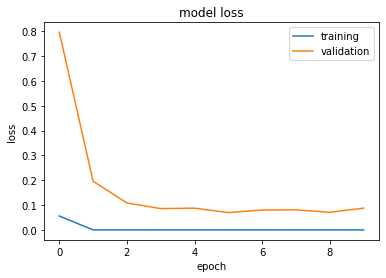

In [ ]:
plt.plot(history_densenet.history['loss'])
plt.plot(history_densenet.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

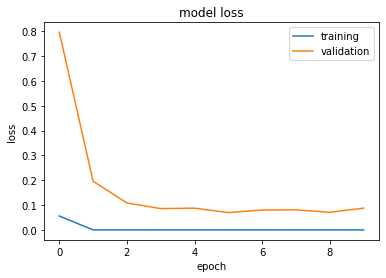

In [ ]:
plt.plot(history_densenet.history['loss'])
plt.plot(history_densenet.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

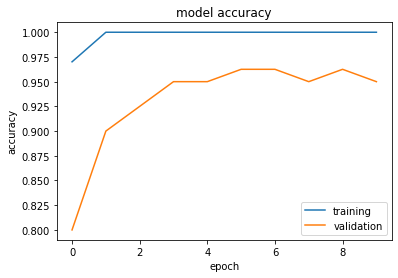

In [ ]:
plt.plot(history_densenet.history['accuracy'])
plt.plot(history_densenet.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

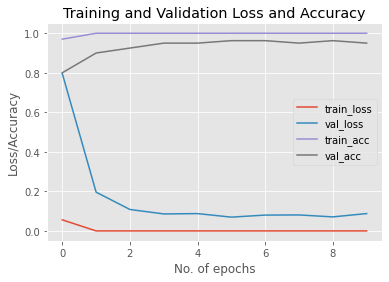

In [ ]:
N = np.arange(0, 10)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history_densenet.history["loss"], label="train_loss")
plt.plot(N, history_densenet.history["val_loss"], label="val_loss")
plt.plot(N, history_densenet.history["accuracy"], label="train_acc")
plt.plot(N, history_densenet.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Loss and Accuracy")
plt.xlabel("No. of epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")


In [ ]:
valid_score = model.evaluate_generator(valid_dataset, steps=10, verbose=1)
print("[INFO] accuracy: {:.2f}%".format(valid_score[1] * 100)) 
print("[INFO] Loss: ",valid_score[0])
print("[INFO] Precision: ",valid_score[1])
print("[INFO] Recall: ",valid_score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


10/10 [==============================] - 2s 155ms/step - loss: 0.0778 - accuracy: 0.9579
[INFO] accuracy: 95.79%
[INFO] Loss:  0.07780386507511139
[INFO] Precision:  0.9578947424888611
[INFO] Recall:  0.9578947424888611


In [ ]:
train_score = model.evaluate_generator(train_dataset, steps=10, verbose=1)
print("[INFO] accuracy: {:.2f}%".format(train_score[1] * 100)) 
print("[INFO] Loss: ",train_score[0])
print("[INFO] Precision: ",train_score[1])
print("[INFO] Recall: ",train_score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


10/10 [==============================] - 3s 349ms/step - loss: 0.0000e+00 - accuracy: 1.0000
[INFO] accuracy: 100.00%
[INFO] Loss:  0.0
[INFO] Precision:  1.0
[INFO] Recall:  1.0


In [ ]:
test_score = model.evaluate_generator(test_dataset,steps=10, verbose=1)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])
print("[INFO] Precision: ",test_score[1])
print("[INFO] Recall: ",test_score[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


10/10 [==============================] - 23s 3s/step - loss: 0.0088 - accuracy: 1.0000
[INFO] accuracy: 100.00%
[INFO] Loss:  0.008776434697210789
[INFO] Precision:  1.0
[INFO] Recall:  1.0


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory(
        Test,
        target_size=(224, 224),
        batch_size=16,
        class_mode='binary',
        shuffle=False) 

Found 87 images belonging to 2 classes.


In [ ]:
predictions = model.predict(test_generator, steps=10, verbose=1)
yPredictions = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

10/10 [==============================] - 1s 107ms/step


In [ ]:
import pandas as pd
import seaborn as sn
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    recall=recall_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("Recall : {}".format(recall))
    print("f1Score : {}".format(f1Score))
   
    cm=confusion_matrix(y_true, y_pred)
   
    plt.figure(figsize = (7,5))
    sn.heatmap( cm, annot=True,cmap="OrRd")
    plt.title("Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    print(cm)
    return accuracy, precision,  recall, f1Score

Accuracy  : 1.0
Precision : 1.0
Recall : 1.0
f1Score : 1.0
[[19  0]
 [ 0 68]]


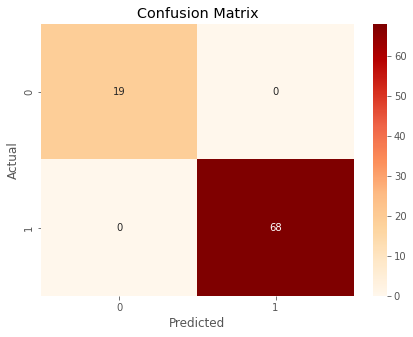

In [ ]:
testAcc,testPrec,testrecall, testFScore = my_metrics(true_classes, yPredictions)

In [ ]:
test_path = "/content/drive/MyDrive/dataset/data/test/normal/"

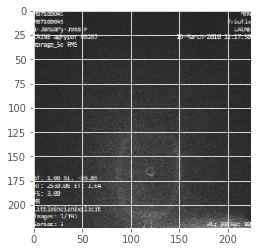

Predicted: Negative


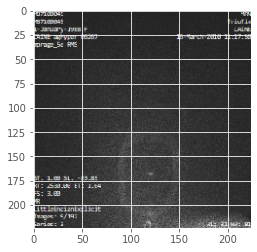

Predicted: Negative


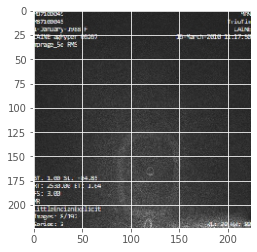

Predicted: Negative


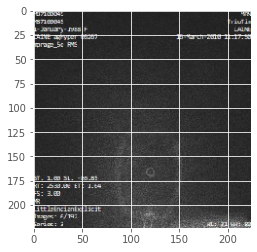

Predicted: Negative


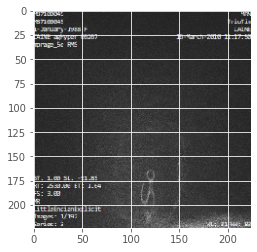

Predicted: Negative


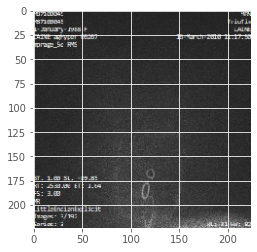

Predicted: Negative


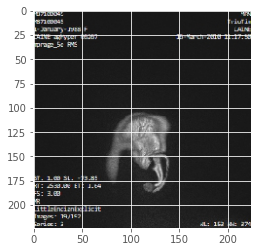

Predicted: Negative


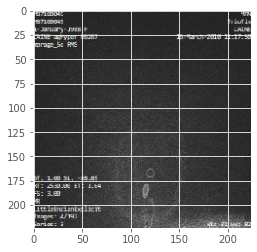

Predicted: Negative


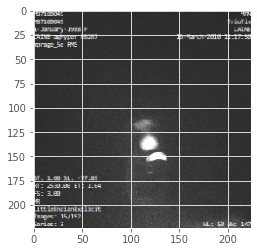

Predicted: Negative


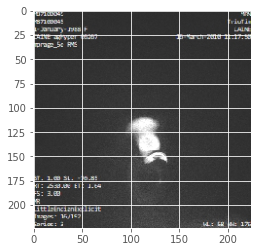

Predicted: Negative


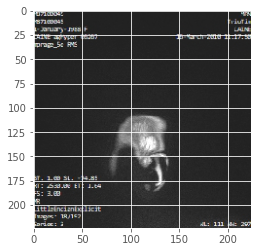

Predicted: Negative


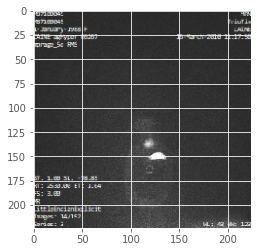

Predicted: Negative


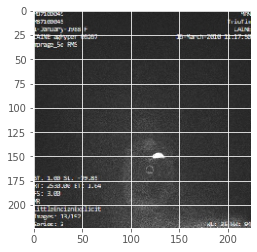

Predicted: Negative


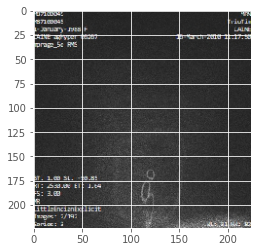

Predicted: Negative


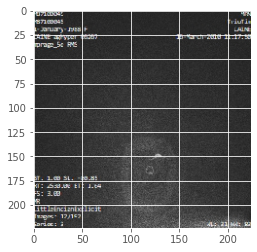

Predicted: Negative


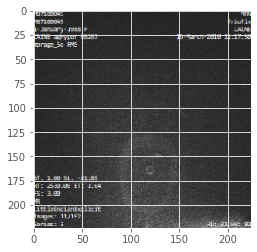

Predicted: Negative


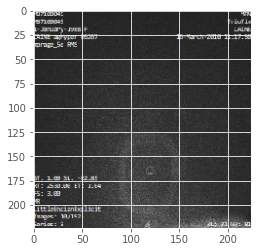

Predicted: Negative


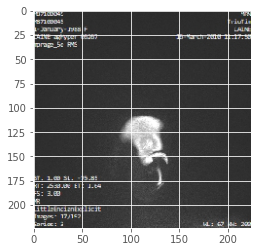

Predicted: Negative


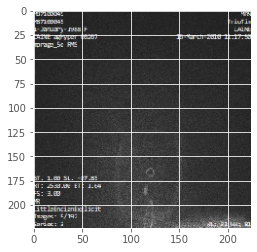

Predicted: Negative


In [ ]:
for i in os.listdir(test_path):
  img=image.load_img(test_path+'//'+i,target_size=(224,224))
  plt.imshow(img)
  plt.show()

  X=image.img_to_array(img)
  X=np.expand_dims(X, axis=0)
  images=np.vstack([X])
  array=model.predict(images)
  result = array[0]
  #print(result)
  answer = np.argmax(result)
  if answer == 0:
    print("Predicted: Negative")
  else :
    print("Predicted: Positive")

In [ ]:
test_path_schi = "/content/drive/MyDrive/dataset/data/test/schizofireina/"

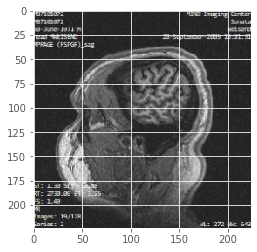

Predicted: Positive


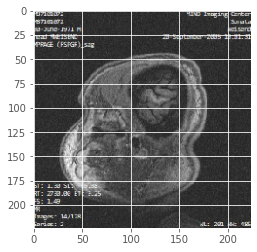

Predicted: Positive


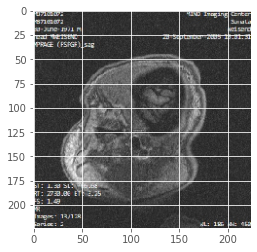

Predicted: Positive


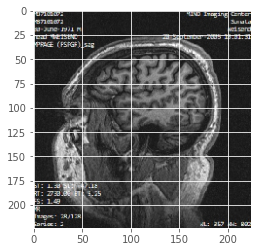

Predicted: Positive


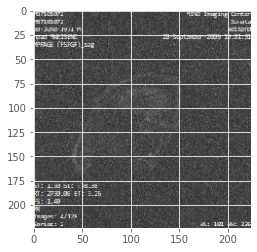

Predicted: Positive


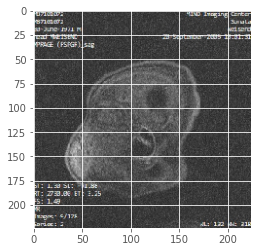

Predicted: Positive


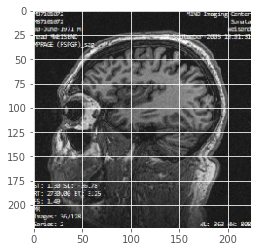

Predicted: Positive


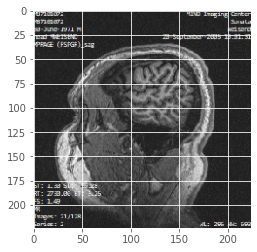

Predicted: Positive


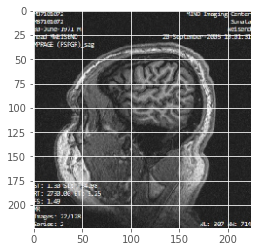

Predicted: Positive


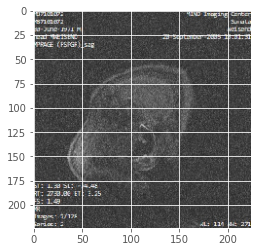

Predicted: Positive


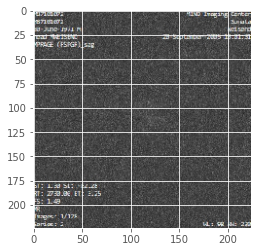

Predicted: Positive


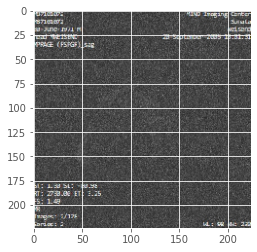

Predicted: Positive


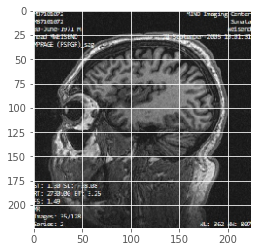

Predicted: Positive


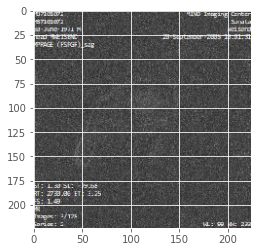

Predicted: Positive


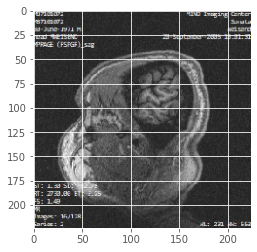

Predicted: Positive


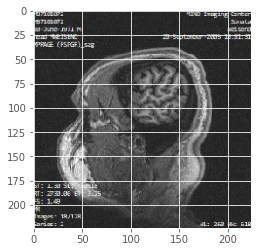

Predicted: Positive


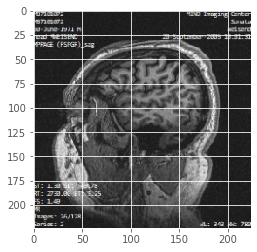

Predicted: Positive


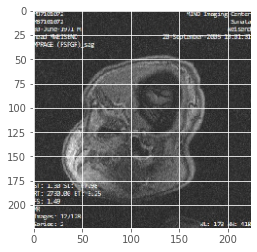

Predicted: Positive


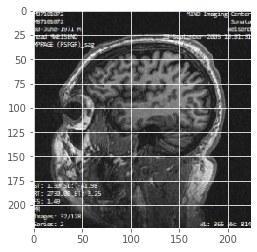

Predicted: Positive


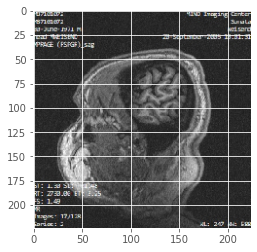

Predicted: Positive


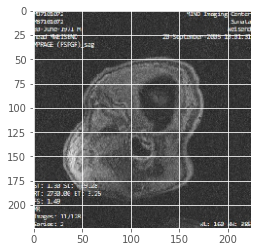

Predicted: Positive


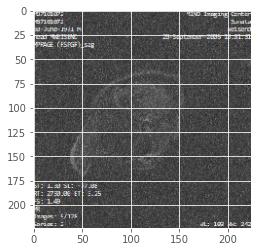

Predicted: Positive


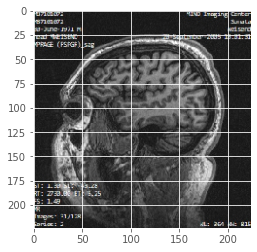

Predicted: Positive


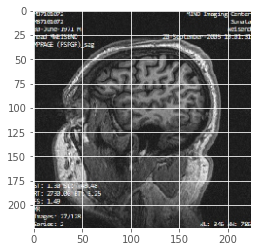

Predicted: Positive


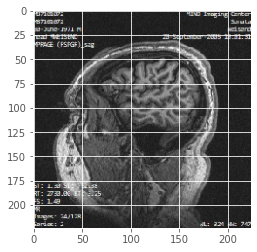

Predicted: Positive


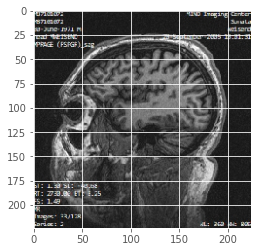

Predicted: Positive


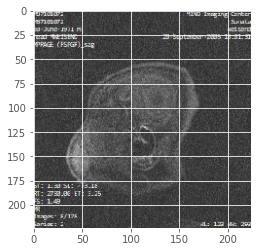

Predicted: Positive


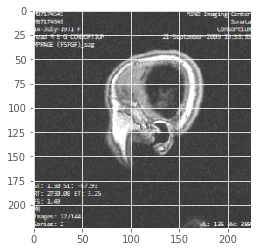

Predicted: Positive


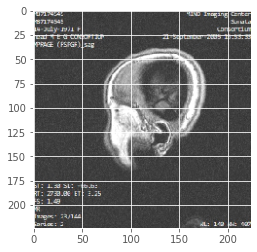

Predicted: Positive


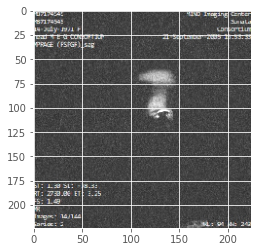

Predicted: Positive


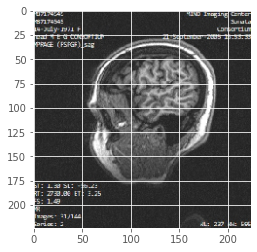

Predicted: Positive


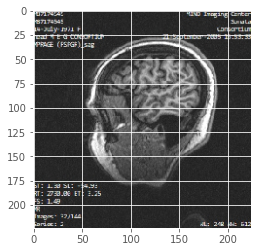

Predicted: Positive


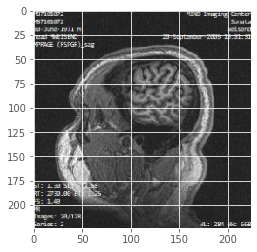

Predicted: Positive


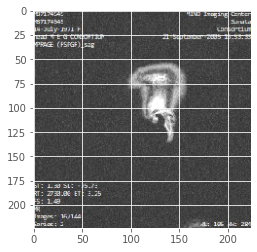

Predicted: Positive


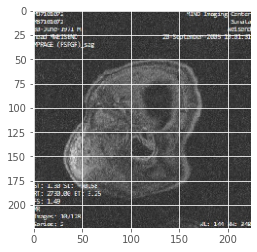

Predicted: Positive


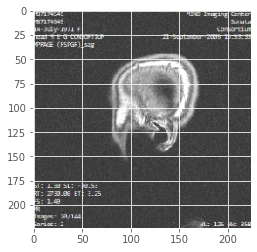

Predicted: Positive


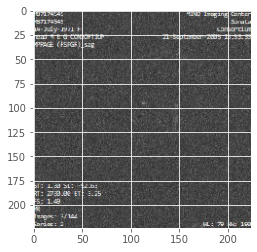

Predicted: Positive


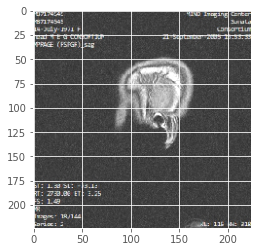

Predicted: Positive


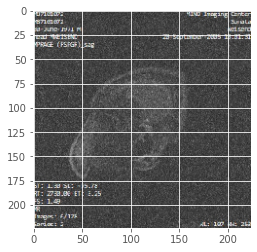

Predicted: Positive


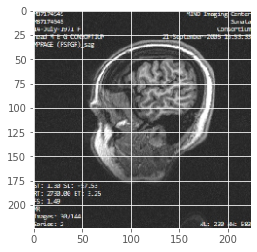

Predicted: Positive


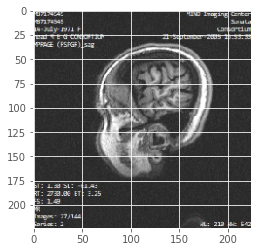

Predicted: Positive


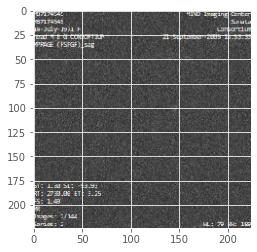

Predicted: Positive


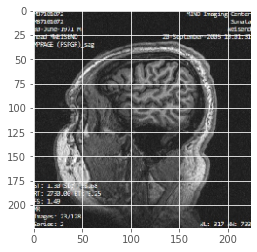

Predicted: Positive


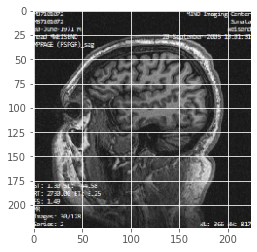

Predicted: Positive


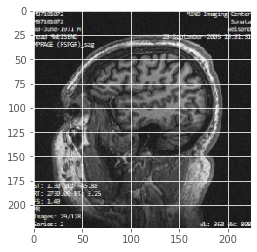

Predicted: Positive


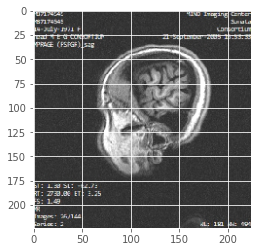

Predicted: Positive


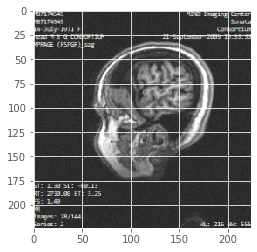

Predicted: Positive


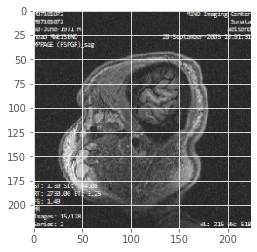

Predicted: Positive


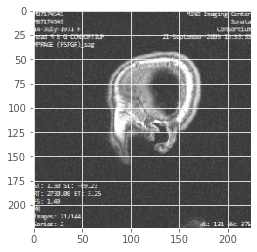

Predicted: Positive


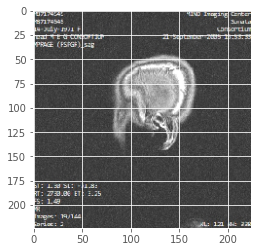

Predicted: Positive


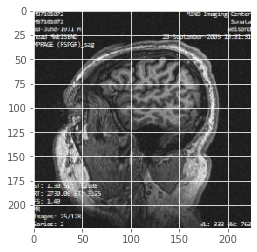

Predicted: Positive


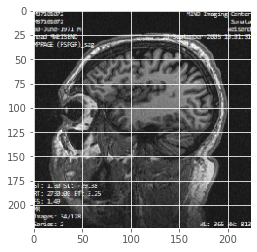

Predicted: Positive


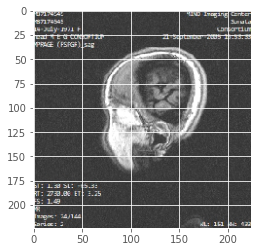

Predicted: Positive


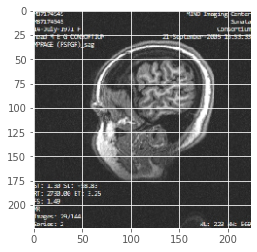

Predicted: Positive


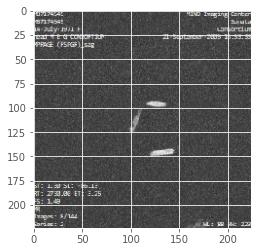

Predicted: Positive


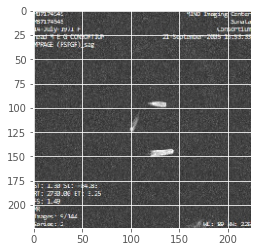

Predicted: Positive


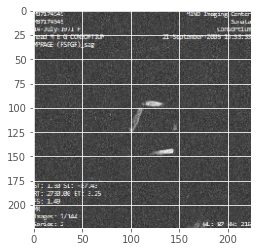

Predicted: Positive


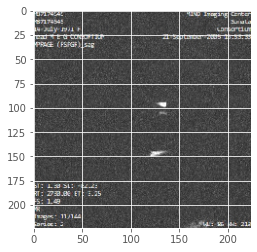

Predicted: Positive


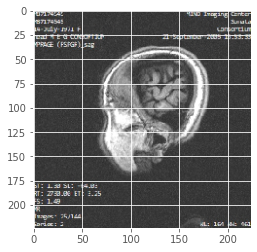

Predicted: Positive


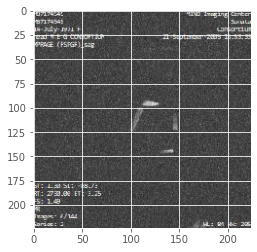

Predicted: Positive


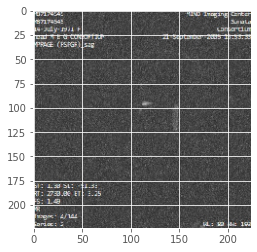

Predicted: Positive


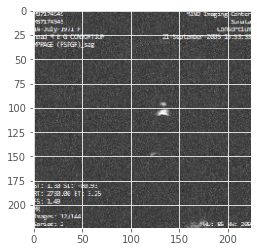

Predicted: Positive


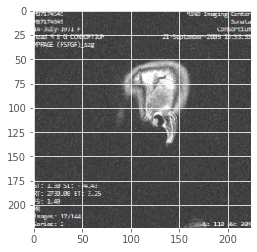

Predicted: Positive


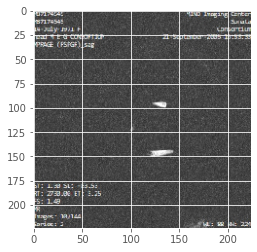

Predicted: Positive


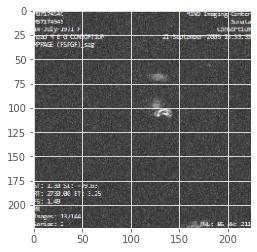

Predicted: Positive


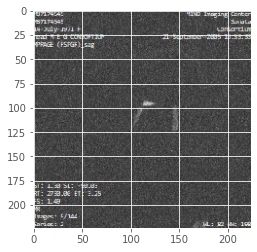

Predicted: Positive


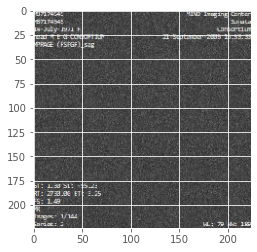

Predicted: Positive


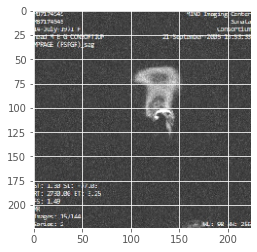

Predicted: Positive


In [ ]:
for i in os.listdir(test_path_schi):
  img1=image.load_img(test_path_schi+'//'+i,target_size=(224,224))
  plt.imshow(img1)
  plt.show()

  X=image.img_to_array(img1)
  X=np.expand_dims(X, axis=0)
  images=np.vstack([X])
  array=model.predict(images)
  result = array[0]
  #print(result)
  answer = np.argmax(result)
  if answer == 0:
    print("Predicted: Negative")
  else :
    print("Predicted: Positive")